In [214]:
# import required modules and packages.
import nltk
from nltk.corpus import stopwords
import string
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
# %matplotlib inline
import joblib
import numpy as np

In [215]:
#pip install scikit-learn

In [216]:
data = pd.read_csv('textClassfication.csv')

In [217]:
data.head()

,Category,Message
0,Banking,"What is a bank account?,A bank account is a de..."
1,Banking,What are the different types of bank accounts ...
2,Banking,"How do I open a bank account in India?,""To ope..."
3,Banking,What are the benefits of having a bank account...
4,Banking,What is the difference between a savings accou...


In [218]:
data.describe()

,Category,Message
count,13363,13362
unique,3,12549
top,Banking,What is the role of the National Housing Bank ...
freq,4868,14


In [219]:
data.isnull().sum()

Category    0
Message     1
dtype: int64

In [220]:
data = data.dropna()

In [221]:
data.duplicated().sum()

813

In [222]:
data = data.drop_duplicates(keep='first')

In [223]:
data.duplicated().sum()

0

In [224]:
data.describe()

,Category,Message
count,12549,12549
unique,3,12549
top,Banking,"What is a bank account?,A bank account is a de..."
freq,4188,1


In [225]:
data['Category'].value_counts()

Category
Banking    4188
Other      4187
Food       4174
Name: count, dtype: int64

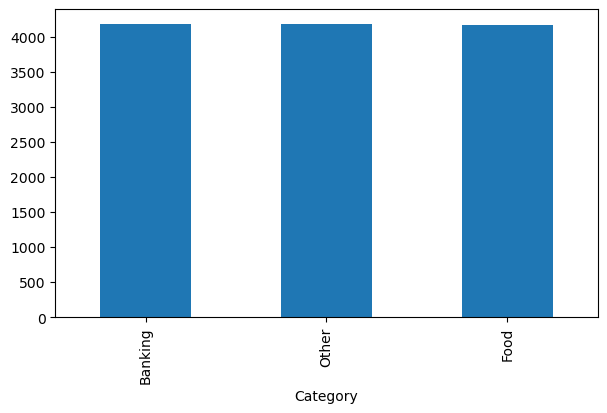

In [226]:
plt.figure(figsize=(7,4))
data.Category.value_counts().plot(kind='bar');

In [227]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/amitgupta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/amitgupta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [228]:
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    
    # Tokenization
    tokens = nltk.word_tokenize(text)
    
    # Removing Punctuation
    tokens = [word for word in tokens if word not in string.punctuation]
    
    # Removing Stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Removing Extra Whitespace and Joining Tokens Back
    text = ' '.join(tokens)
    
    return text

In [229]:
data['transformed_text'] = data['Message'].apply(preprocess_text)

In [230]:
data['transformed_text'].apply(lambda x: len(x.split(' '))).sum()


893263

In [231]:
data.head()

,Category,Message,transformed_text
0,Banking,"What is a bank account?,A bank account is a de...",bank account bank account deposit account held...
1,Banking,What are the different types of bank accounts ...,different types bank accounts available india ...
2,Banking,"How do I open a bank account in India?,""To ope...",open bank account india '' open bank account i...
3,Banking,What are the benefits of having a bank account...,benefits bank account '' many benefits bank ac...
4,Banking,What is the difference between a savings accou...,difference savings account current account '' ...


In [232]:
X_train, X_test, y_train, y_test = train_test_split(data['transformed_text'], data['Category'], test_size=0.3, random_state=42)


In [233]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the max_features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_train_tfidf.shape

(8784, 5000)

In [234]:
model = MultinomialNB()

In [235]:
model.fit(X_train_tfidf, y_train, sample_weight=None)

MultinomialNB()

In [236]:
y_pred = model.predict(X_test_tfidf)
print(y_pred)

['Food' 'Food' 'Banking' ... 'Banking' 'Other' 'Food']


In [237]:
accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9795484727755644


In [238]:
import pickle

In [239]:
pickle.dump(tfidf_vectorizer,open('vectorizer_new.pkl','wb'))
pickle.dump(model,open('model_new.pkl','wb'))

In [240]:
modelNB = joblib.load('model_new.pkl')  # Replace with your model file


In [243]:
# custom_text = "This is a custom text that you want to classify."
custom_text = "Entertainment"
# custom_text = "I like mango"
# custom_text = "In publishing and graphic design, Lorem ipsum is a placeholder text commonly used to demonstrate the visual form"
custom_text_tfidf = tfidf_vectorizer.transform([custom_text])
predicted_category = modelNB.predict(custom_text_tfidf)
print(f"Predicted Category: {predicted_category[0]}")

Predicted Category: Banking


In [244]:
class_probabilities = modelNB.predict_proba(custom_text_tfidf)
print(f"Class Probability: {class_probabilities}")

Class Probability: [[0.33458561 0.33447177 0.33094262]]


In [245]:
column_array = data['Category'].unique()


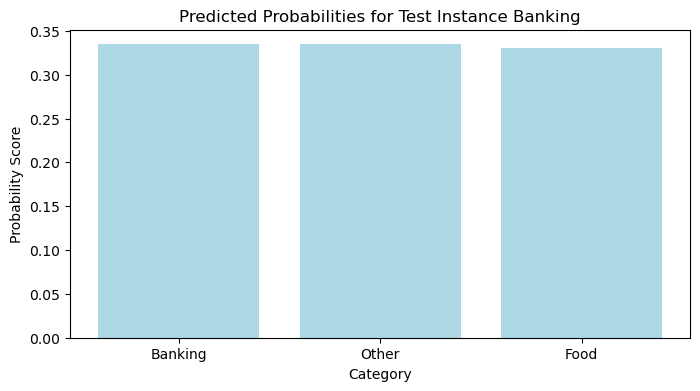

In [246]:
for i in range(len(predicted_category)):
    plt.figure(figsize=(8, 4))
    plt.bar(column_array, class_probabilities[i], color='lightblue')
    plt.xlabel('Category')
    plt.ylabel('Probability Score')
    plt.title(f'Predicted Probabilities for Test Instance {predicted_category[i]}')
    plt.show()